<h3>Metadata</h3>
<p><b>Course:</b> Signals and Systems</p>
<p><b>Assignment:</b> CHW2</p>
<p><b>Student Name:</b> Yones Sohrabi </p>
<p><b>Student Number:</b> 9904833 </p>
<p><b>Reference:</b> Signals and Systems Labratory - Homework Problems - Section 3.4</p>
<p><b>Question Number:</b> 3.4.12</p>


<h3>Question Image</h3>
<p align="center">
  <img src="3.4.12.png" width="1200">
</p>


<h3>Problem Assumptions</h3>
<p>Invertibility means distinct inputs must produce distinct outputs (one-to-one mapping).</p>
<p>For each system, we determine whether the input can be uniquely recovered from the output, and if possible, derive an explicit inverse relationship.</p>

<h3>Invertibility Criterion</h3>
<p>A system is invertible if the input-output mapping can be written as y = f(x) and is one-to-one (injective).</p>
<p>Equivalently, if x1(t) ≠ x2(t) implies y1(t) ≠ y2(t), then the system is invertible; otherwise it is not.</p>

$$
\text{Invertible} \iff f \text{ is one-to-one: } f(x_1)=f(x_2) \Rightarrow x_1=x_2
$$


<h3>Environment Setup</h3>
<p>Symbolic expressions are represented using SymPy to present inverse mappings in closed form whenever they exist.</p>


In [2]:
import sympy as sp
t = sp.Symbol('t', real=True)
x = sp.Function('x')
y = sp.Function('y')


<h3>System 1</h3>

$$
y(t) = \cos(x(t))
$$

<p>This system is not invertible because the cosine mapping is not one-to-one over ℝ.</p>
<p>A counterexample exists since distinct inputs can produce the same output.</p>

$$
x_1(t)=\alpha,\; x_2(t)=-\alpha,\; \alpha\neq 0
\;\Rightarrow\;
\cos(x_1)=\cos(x_2)
$$


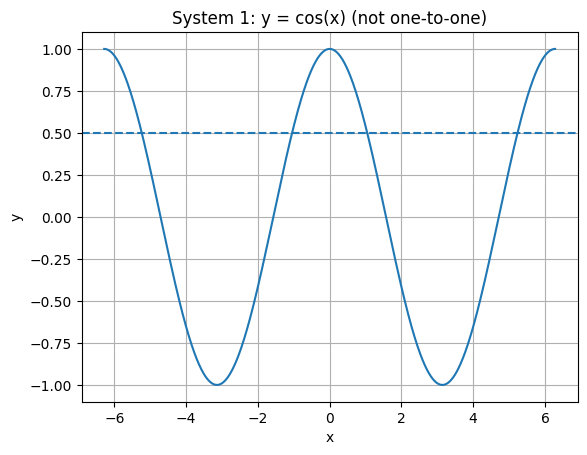

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-2*np.pi, 2*np.pi, 800)
y_vals = np.cos(x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.axhline(0.5, linestyle='--')  # shows multiple intersections
plt.xlabel("x")
plt.ylabel("y")
plt.title("System 1: y = cos(x) (not one-to-one)")
plt.grid(True)
plt.show()


<p>The horizontal line intersects the curve at multiple x values for the same y, confirming non-injectivity and non-invertibility.</p>


<h3>System 2</h3>

$$
y(t)=x(t)\cos(t)
$$

<p>This system is not one-to-one at times where cos(t)=0, because y(t)=0 for any x(t) at those instants.</p>
<p>On intervals where cos(t)≠0, the mapping is one-to-one and the inverse exists.</p>

$$
\cos(t)\neq 0 \;\Rightarrow\; x(t)=\frac{y(t)}{\cos(t)}
$$


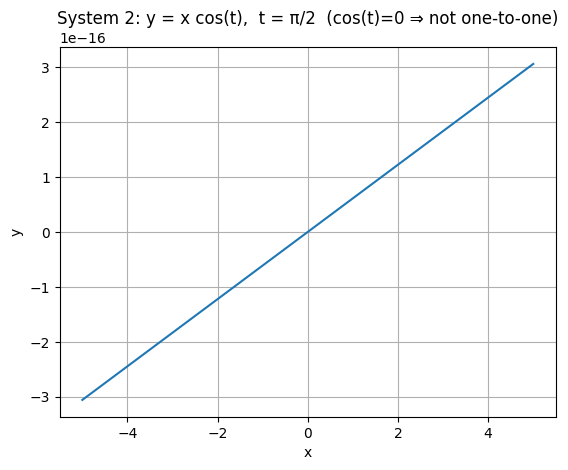

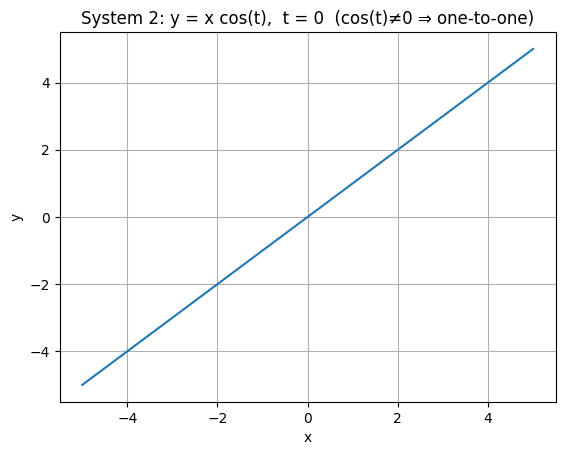

In [3]:
x_vals = np.linspace(-5, 5, 400)

# Case 1: cos(t)=0 => not invertible
t1 = np.pi/2
y1 = x_vals * np.cos(t1)

plt.figure()
plt.plot(x_vals, y1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("System 2: y = x cos(t),  t = π/2  (cos(t)=0 ⇒ not one-to-one)")
plt.grid(True)
plt.show()

# Case 2: cos(t)≠0 => invertible
t2 = 0
y2 = x_vals * np.cos(t2)

plt.figure()
plt.plot(x_vals, y2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("System 2: y = x cos(t),  t = 0  (cos(t)≠0 ⇒ one-to-one)")
plt.grid(True)
plt.show()


In [4]:
import sympy as sp
t = sp.Symbol('t', real=True)
expr_inv2 = sp.Eq(sp.Function('x')(t), sp.Function('y')(t)/sp.cos(t))
expr_inv2


Eq(x(t), y(t)/cos(t))

<h3>System 3</h3>

$$
y(t)=x(t)e^{-t}
$$

<p>Since e^{-t}≠0 for all real t, the mapping is one-to-one pointwise in time and the inverse exists for all t.</p>

$$
x(t)=y(t)e^{t}
$$


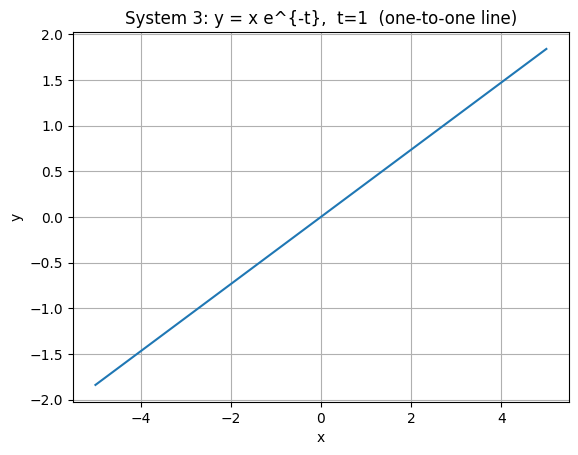

In [5]:
x_vals = np.linspace(-5, 5, 400)
t0 = 1.0
y_vals = x_vals * np.exp(-t0)

plt.figure()
plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("y")
plt.title("System 3: y = x e^{-t},  t=1  (one-to-one line)")
plt.grid(True)
plt.show()


In [5]:
# e^{-t} is never zero for real t, so inverse exists for all t.
# x(t) = y(t) e^{t}
expr_inv3 = sp.Eq(sp.Function('x')(t), sp.Function('y')(t)*sp.exp(t))
expr_inv3


Eq(x(t), y(t)*exp(t))

<h3>System 4</h3>

$$
y(t)=e^{-x(t)}
$$

<p>The exponential function is strictly monotonic, hence one-to-one, so the inverse exists for outputs in its range.</p>

$$
y(t)>0 \;\Rightarrow\; x(t)=-\ln\!\big(y(t)\big)
$$


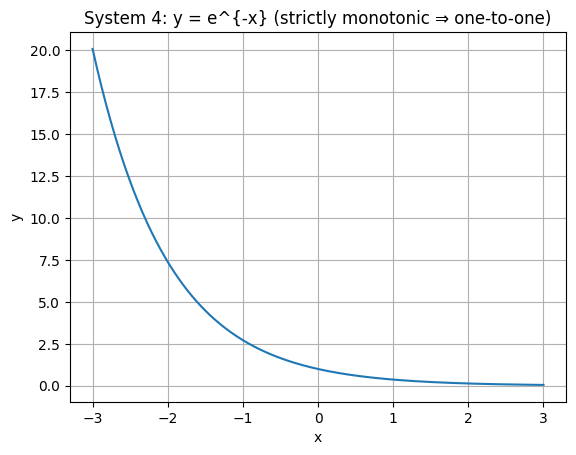

In [6]:
x_vals = np.linspace(-3, 3, 400)
y_vals = np.exp(-x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.xlabel("x")
plt.ylabel("y")
plt.title("System 4: y = e^{-x} (strictly monotonic ⇒ one-to-one)")
plt.grid(True)
plt.show()


In [7]:
# Exponential is one-to-one: y = e^{-x} => ln(y) = -x => x = -ln(y)
# Requires y(t) > 0
expr_inv4 = sp.Eq(sp.Function('x')(t), -sp.log(sp.Function('y')(t)))
expr_inv4


Eq(x(t), -log(y(t)))

<h3>Result Analysis</h3>
<p>System 1 is not invertible because the plot of y=cos(x) shows multiple x values producing the same y.</p>
<p>System 2 is not invertible at times where cos(t)=0 (all inputs map to y=0), but is invertible on intervals where cos(t)≠0, as shown by the linear plots.</p>
<p>Systems 3 and 4 are invertible because their plots are one-to-one (nonzero-slope linear mapping for System 3 and strictly monotonic exponential mapping for System 4).</p>

<h3>Mathematical Solution</h3>

<p><b>System 1:</b></p>

$$
y(t)=\cos(x(t)), \qquad \text{not one-to-one over } \mathbb{R}
$$

<p><b>System 2 (conditional):</b></p>

$$
y(t)=x(t)\cos(t)
\;\Rightarrow\;
x(t)=\frac{y(t)}{\cos(t)}, \quad \cos(t)\neq 0
$$

<p><b>System 3:</b></p>

$$
y(t)=x(t)e^{-t}
\;\Rightarrow\;
x(t)=y(t)e^{t}
$$

<p><b>System 4:</b></p>

$$
y(t)=e^{-x(t)}
\;\Rightarrow\;
x(t)=-\ln\!\big(y(t)\big), \quad y(t)>0
$$

<h3>Key Characteristics</h3>
<ul>
  <li>Invertibility requires a one-to-one input–output mapping.</li>
  <li>Time-varying multiplicative factors break invertibility at their zeros.</li>
  <li>Monotonic exponential mappings are invertible via logarithmic operations.</li>
</ul>

<h3>Physical Interpretation</h3>
<p>Invertible systems allow perfect reconstruction of the input signal from the output, whereas non-invertible systems inherently lose information.</p>
